In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests, re

In [2]:
from konlpy.tag import Okt
okt = Okt()

In [3]:
df_word = pd.read_excel('./감성사전_편집.xlsx')
df_word.set_index('Unnamed: 0', drop=True, inplace=True)
std_df = pd.read_csv('./stopwords-ko.txt')

In [4]:
def novel_score_extract(url):
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')

    text = soup.select('div.detail_view_content')[0].text
    text = ' '.join(re.compile('[ㄱ-ㅎ가-힣]+').findall(text))

    okt = Okt()
    okt_li = okt.morphs(text)
    globals()['word_li'] = [i for i in okt_li if len(i) >= 2]
    #word_li = [i for i in word_li if i not in std_df ]
    


    
    
    
    mood_count = {'슬픔': 0,
    '분노': 0,
    '기쁨': 0,
    '긴장감': 0,
    '무서운': 0,
    '증오': 0,
    '차분히': 0,
    '섹시': 0,
    '브릿락': 0,
    '설렘': 0,
    '몽환': 0}
    mood_words = {}

    for word in word_li:
        if word in df_word.index:
            word_mood = df_word.columns[df_word.loc[word, :] == 1].values[0]
            if word_mood in mood_words:
                mood_count[word_mood] += 1
                mood_words[word_mood].append(word)
            else:
                mood_count[word_mood] += 1
                mood_words[word_mood] =[word]
    for mood in mood_words.keys():
        mood_words[mood] = set(mood_words[mood])

    novel_score = list(mood_count.values())
    return novel_score

In [5]:
df_emotion = pd.read_csv('./노래별감성점수_최종.csv')
emotion = df_emotion.drop(['Unnamed: 0', '노래', '가수'], axis=1)

In [6]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

In [7]:
def search_similarity(a):
    similarity_li = []
    for i in range(len(emotion)):
        b = emotion.iloc[i, :].values
        similarity_li.append(cosine_similarity(a, b))
    song_score = df_emotion.iloc[np.argmax(similarity_li), 3:].values
    title = df_emotion.iloc[np.argmax(similarity_li), 1]
    singer = df_emotion.iloc[np.argmax(similarity_li), 2]
    return f"{singer} - {title}", song_score

In [8]:
# 로맨스 https://novel.naver.com/webnovel/detail?novelId=994958&volumeNo=2
# 판타지 https://novel.naver.com/webnovel/detail?novelId=1002530&volumeNo=102
# 무협 https://novel.naver.com/webnovel/detail?novelId=927909&volumeNo=114
# 미스터리 https://novel.naver.com/webnovel/detail?novelId=987046&volumeNo=84

In [9]:
url = 'https://novel.naver.com/webnovel/detail?novelId=1002530&volumeNo=102'
novel_score = novel_score_extract(url)
music, song_score = search_similarity(novel_score)

In [10]:
music

'VIVIZ (비비지) - BOP BOP!'

In [11]:
word_counts = {}
for i in word_li:
    if i in word_counts:
        word_counts[i] += 1
    else:
        word_counts[i] = 1

In [12]:
sorted(word_counts.items(), key = lambda item: item[1], reverse=True)

[('드래곤', 39),
 ('오크', 26),
 ('거북', 23),
 ('했다', 23),
 ('족장', 22),
 ('으로', 22),
 ('하지만', 16),
 ('때문', 14),
 ('이다', 13),
 ('라텔', 12),
 ('이었다', 11),
 ('주술', 10),
 ('하트', 9),
 ('있었다', 9),
 ('였다', 8),
 ('하는', 8),
 ('녀석', 7),
 ('에게', 7),
 ('모두', 7),
 ('하고', 7),
 ('존재', 7),
 ('에서', 7),
 ('까지', 7),
 ('거대한', 6),
 ('처럼', 6),
 ('오웬', 6),
 ('마법사', 6),
 ('갑자기', 5),
 ('시작', 5),
 ('정신', 5),
 ('됐다', 5),
 ('모습', 5),
 ('공격', 5),
 ('정도', 5),
 ('지금', 5),
 ('공포', 5),
 ('있던', 5),
 ('원정', 5),
 ('상황', 4),
 ('에는', 4),
 ('되는', 4),
 ('생각', 4),
 ('전사', 4),
 ('없는', 4),
 ('그리고', 4),
 ('다른', 4),
 ('결국', 4),
 ('이라', 4),
 ('마력', 4),
 ('감정', 4),
 ('얼굴', 4),
 ('늙은', 4),
 ('없었다', 4),
 ('했으나', 3),
 ('괴물', 3),
 ('않고', 3),
 ('마르', 3),
 ('바다', 3),
 ('돌격', 3),
 ('세상', 3),
 ('오거', 3),
 ('로는', 3),
 ('군대', 3),
 ('크게', 3),
 ('번개', 3),
 ('움찔', 3),
 ('그게', 3),
 ('연기', 3),
 ('다시', 3),
 ('상대', 3),
 ('하게', 3),
 ('계속', 3),
 ('보며', 3),
 ('써야', 3),
 ('그런', 3),
 ('많은', 3),
 ('물건', 3),
 ('상자', 3),
 ('의식', 3),
 ('아니었다', 3),
 ('주변', 3),
 ('사

In [13]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] =False

In [14]:
bar_label = df_emotion.columns[3:].values
index = np.arange(len(bar_label))

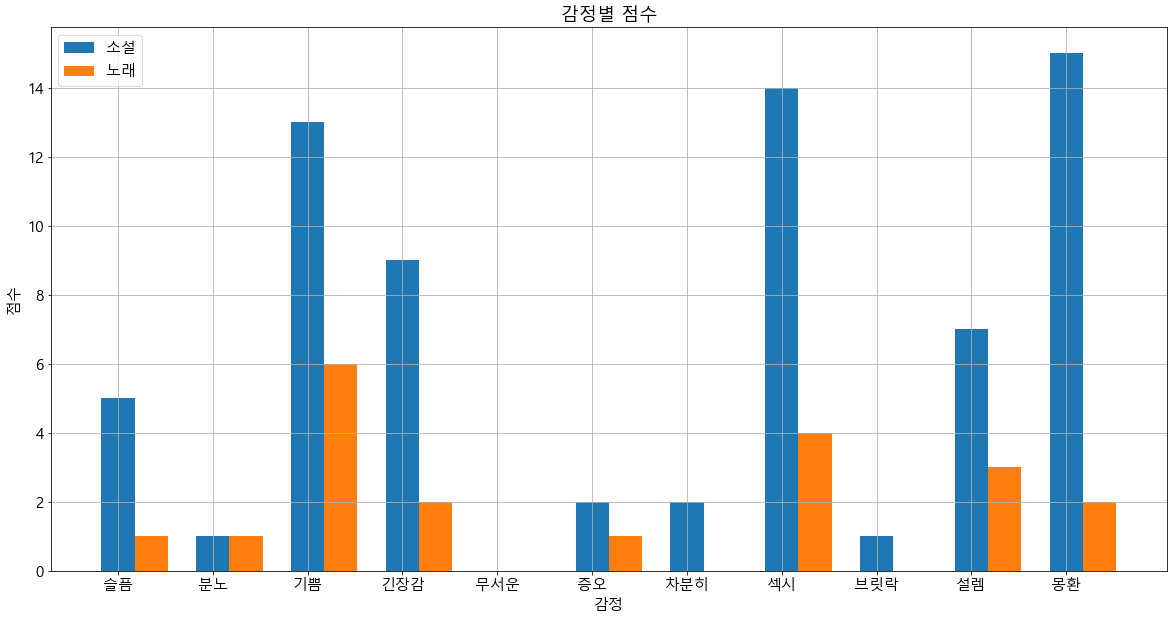

In [43]:
plt.figure(figsize=(20, 10))
plt.title('감정별 점수')
plt.xlabel('감정')
plt.ylabel('점수')
plt.grid(True)
p1 = plt.bar(index, novel_score, 0.35)
p2 = plt.bar(index + 0.35, song_score, 0.35)
plt.xticks(index, bar_label)
plt.legend((p1[0], p2[0]), ('소설', '노래'), fontsize=15)

In [ ]:
# wc = WordCloud(background_color ='white', colormap='autumn', font_path='malgun', width=250, height=250, scale=1.0, max_font_size=100)
# gen = wc.generate_from_frequencies(word_counts)
# plt.figure(figsize=(10, 10))
# plt.imshow(gen)